## Linking Google Drive to Colab

In [1]:
#@title Mount Google Drive {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Mini_Project
! ls

/content/drive/MyDrive/Mini_Project
2_2_train_gender_model.ipynb   Emotion	    Gender
2_3_train_emotion_model.ipynb  Final.ipynb  Test_input


## Importing essential libraries

In [3]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


## Loading Gender/Emotion Models

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# load and evaluate a saved model
export_dir='/content/drive/MyDrive/Mini_Project/Gender/Output/gender_model_pretrained.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 70)        700       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 65)        41015     
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 65)       260       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 65)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 60)        35160 

In [6]:
export_dir='/content/drive/MyDrive/Mini_Project/Emotion/Output/emotion_model_pretrained.h5'
emotion_model = load_model(export_dir)

# summarize model.
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [7]:

gender_ranges = ['male', 'female']
emotion_ranges= ['positive','negative','neutral']

## Loading Test Images

In [11]:
#img_path = "/content/drive/MyDrive/Mini_Project/Test_input/Images/sad_man.jpg"
#img_path = "/content/drive/MyDrive/Mini_Project/Test_input/Images/happy_man.jpg"
#img_path = "/content/drive/MyDrive/Mini_Project/Test_input/Images/man-anger.jpg"
#img_path="/content/drive/MyDrive/Mini_Project/Test_input/Images/gpic1.jpg"
#img_path="/content/drive/MyDrive/Mini_Project/Test_input/Images/20201025_192344.jpg"
#img_path="/content/drive/MyDrive/Mini_Project/Test_input/Images/IMG_20200726_145325_801.jpg"
#img_path="/content/drive/MyDrive/Mini_Project/Test_input/Images/46.jpg"
img_path="/content/drive/MyDrive/Mini_Project/Test_input/Images/fam2.jpg"
#img_path="/content/drive/MyDrive/Mini_Project/Test_input/Images/IMG_20201225_173035.jpg"
#img_path="/content/drive/MyDrive/Mini_Project/Test_input/Images/WhatsApp Image 2022-11-08 at 11.11.04 AM.jpeg"

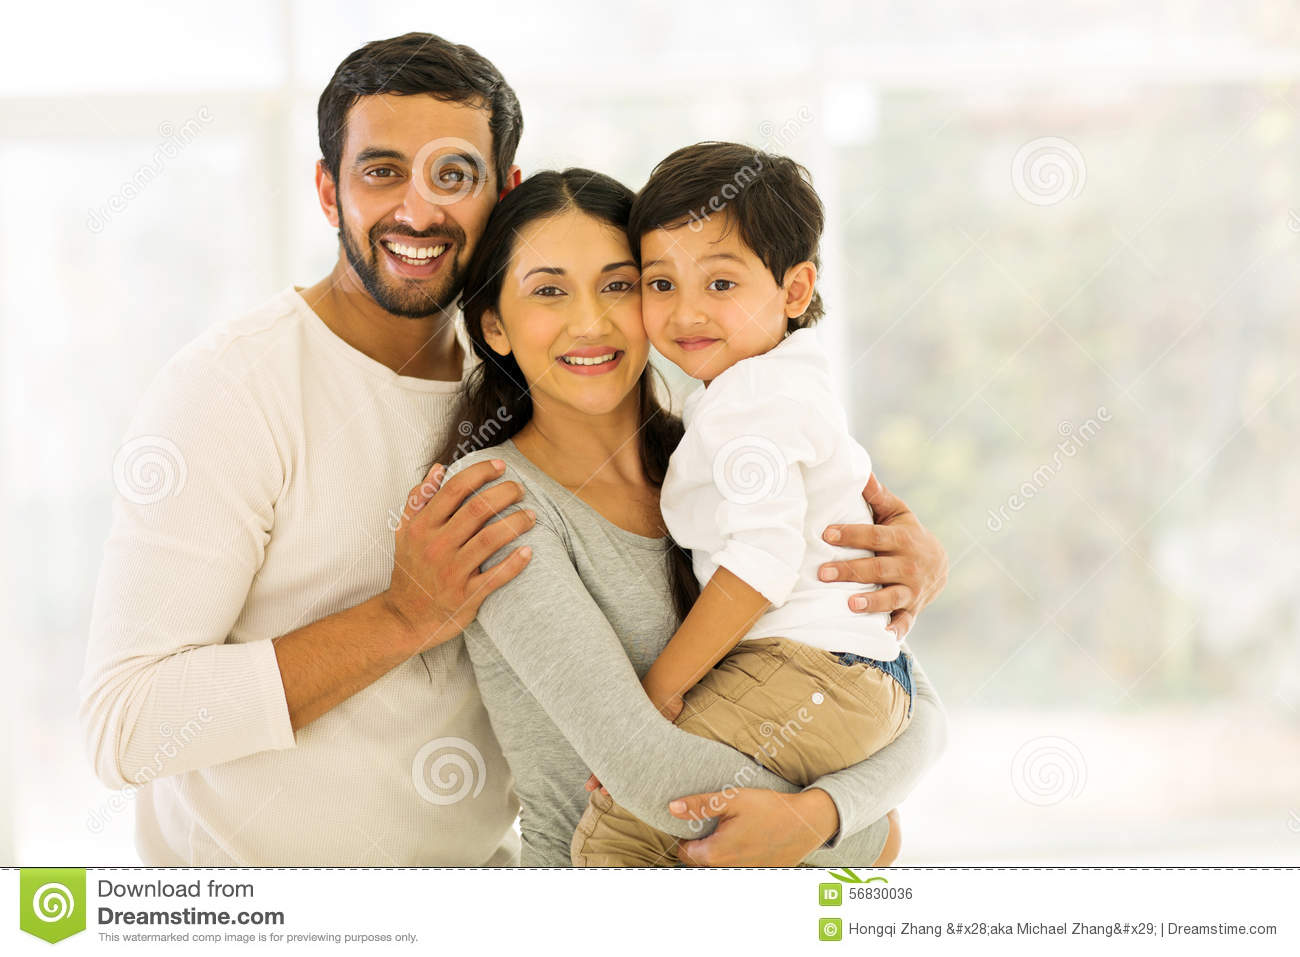

In [12]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

## Results on Gender/Emotion

1/1 [==============================] - 0s 14ms/step
1: male, positive
1/1 [==============================] - 0s 15ms/step
2: male, positive
1/1 [==============================] - 0s 14ms/step
3: female, positive


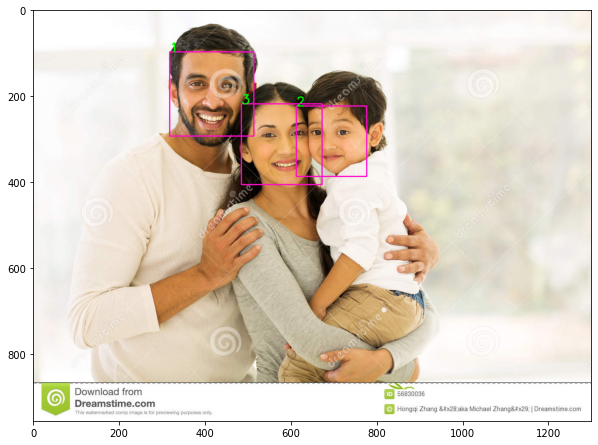

In [13]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Mini_Project/Test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]


  output_str = str(i) + ": "+  output_gender +  ', '+ output_emotion
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))